# Sales Analysis

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os 

### Read data and merge monthly data into a single dataset for the whole year

In [8]:
files=[file for file in os.listdir("E:/Data analytics/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]
for i in files:
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [11]:
all_months_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv("E:/Data analytics/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,current_data])
    

In [117]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [17]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Data Cleaning

#### Removing all the rows with null values from the dataset

In [18]:
all_months_data= all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing rows that are not in date format from the 'Order Date' column

In [19]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2]!='Or']

#### Converting "Quantity Ordered" and "Price Each" columns from strings to numericals

In [20]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])


### Augmenting Data with additional columns

#### Creating Month column

In [40]:
all_months_data['Month'] = pd.to_datetime(all_months_data['Order Date']).dt.month
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Creating City column

In [43]:
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip('')}  ({x.split(',')[2].split(' ')[1]})")
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration and Analysis

### 1.Analysing what was the best month for sales, and how much was earned that month?

In [54]:
all_months_data['Sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.groupby('Month').sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_14452\3477571162.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_months_data.groupby('Month').sum()


,Quantity Ordered,Price Each,sales,Sales
Month,,,,
1,10903,1811768.38,1822256.73,1822256.73
2,13449,2188884.72,2202022.42,2202022.42
3,17005,2791207.83,2807100.38,2807100.38
4,20558,3367671.02,3390670.24,3390670.24
5,18667,3135125.13,3152606.75,3152606.75
6,15253,2562025.61,2577802.26,2577802.26
7,16072,2632539.56,2647775.76,2647775.76
8,13448,2230345.42,2244467.88,2244467.88
9,13109,2084992.09,2097560.13,2097560.13


C:\Users\acer\AppData\Local\Temp\ipykernel_14452\3038756803.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_months_data.groupby(['Month']).sum()['Sales'])


Text(0.5, 1.0, 'Sales Per Month')

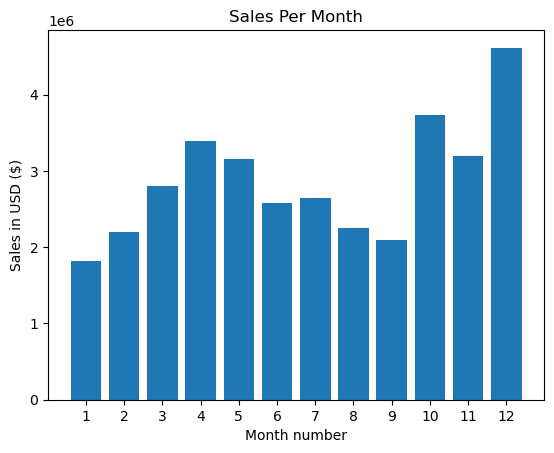

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

months = range(1,13)

plt.bar(months,all_months_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Sales Per Month')

### Finding out which city has sold the most number of products

In [76]:
by_city=all_months_data.groupby(['City'],as_index=False).sum()
by_city

C:\Users\acer\AppData\Local\Temp\ipykernel_14452\2339499828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_city=all_months_data.groupby(['City'],as_index=False).sum()


,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2779908.20,104794,2795498.58
1,Austin (TX),11153,1809873.61,69829,1819581.75
2,Boston (MA),22528,3637409.77,141112,3661642.01
3,Dallas (TX),16730,2752627.82,104620,2767975.40
4,Los Angeles (CA),33289,5421435.23,208325,5452570.80
5,New York City (NY),27932,4635370.83,175741,4664317.43
6,Portland (ME),2750,447189.25,17144,449758.27
7,Portland (OR),11303,1860558.22,70621,1870732.34
8,San Francisco (CA),50239,8211461.74,315520,8262203.91
9,Seattle (WA),16553,2733296.01,104941,2747755.48


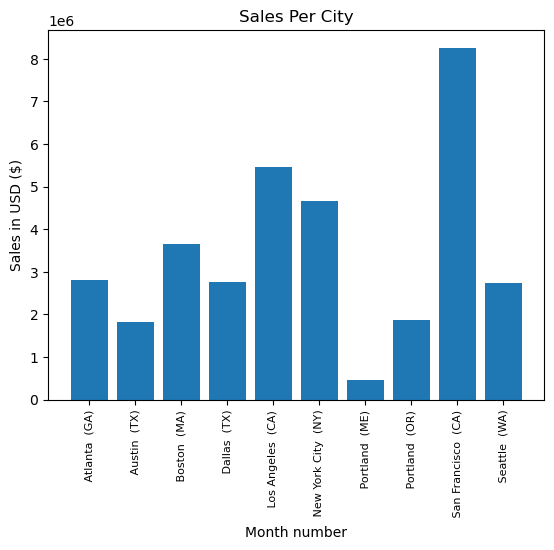

In [120]:
plt.bar(by_city["City"],by_city['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Sales Per City')
plt.xticks(by_city["City"], rotation='vertical', size=8)
plt.show()

### Discovering at what time the advertisements should be displayed to maximize likelihood of customer's buying product

In [122]:
all_months_data['Hour'] = pd.to_datetime(all_months_data['Order Date']).dt.hour
all_months_data['Minute'] = pd.to_datetime(all_months_data['Order Date']).dt.minute

In [90]:
by_hour=all_months_data.groupby('Hour', as_index = False).count()
by_hour.head()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854


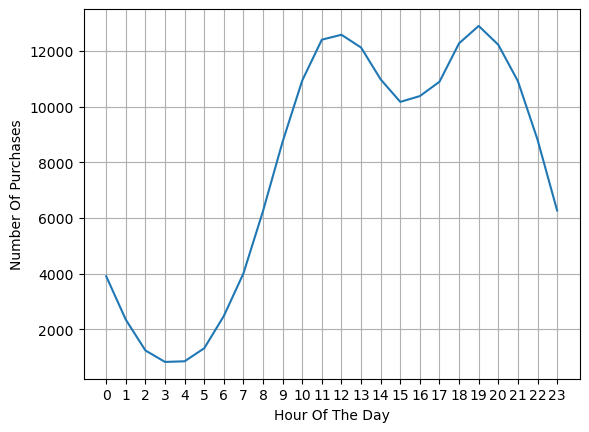

In [92]:
plt.plot(by_hour['Hour'], by_hour['Order ID'])
plt.xticks(by_hour['Hour'])
plt.ylabel('Number Of Purchases')
plt.xlabel('Hour Of The Day')
plt.grid()
plt.show()


### Finding out the products that are most often sold together

In [28]:
df=all_months_data[all_months_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4


In [94]:
df2=df.groupby("Order ID",as_index=False)['Product'].apply(','.join)
df2

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [101]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Analysing what products sold the most and the reasons behind it

In [105]:
product_group = all_months_data.groupby('Product',as_index = False).sum()
product_group

C:\Users\acer\AppData\Local\Temp\ipykernel_14452\1328194503.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = all_months_data.groupby('Product',as_index = False).sum()


,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


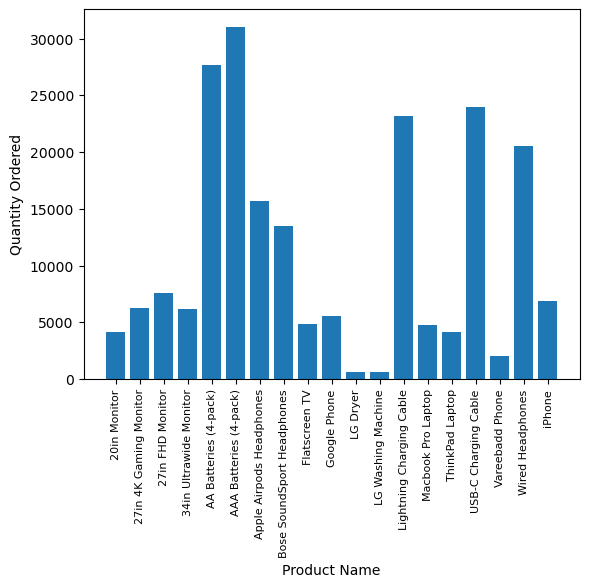

In [108]:
plt.bar(product_group['Product'],product_group['Quantity Ordered'])
plt.xticks(product_group['Product'], rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.show()

In [123]:
product_group_mean = all_months_data.groupby('Product',as_index = False).mean()
product_group_mean.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_14452\1351811750.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group_mean = all_months_data.groupby('Product',as_index = False).mean()


,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290
1,27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640
2,27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054
3,34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517
4,AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046


C:\Users\acer\AppData\Local\Temp\ipykernel_14452\2160740078.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_group['Product'], rotation='vertical', size=8)
C:\Users\acer\AppData\Local\Temp\ipykernel_14452\2160740078.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


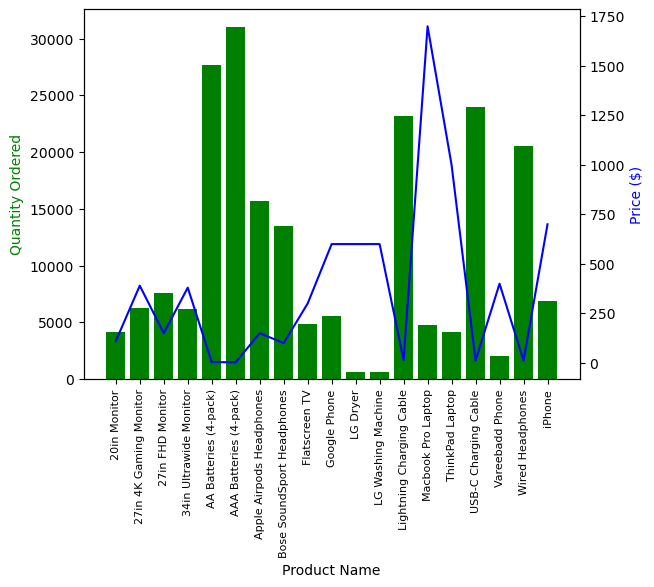

In [116]:
fig, ax1 =plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_group['Product'], product_group['Quantity Ordered'], color='g')
ax2.plot(product_group_mean['Product'], product_group_mean['Price Each'], color='b') 

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_group['Product'], rotation='vertical', size=8)

fig.show()